In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
churn_cust_info = pd.read_excel('Bank_Churn.xlsx')
churn_acct_info = pd.read_excel('Bank_Churn.xlsx', sheet_name=1)

In [119]:
churn_cust_info.sample(10)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
6196,15576304,Bailey,698,France,Male,29.0,5,€152723.23
6631,15665177,Booth,613,French,Male,44.0,3,€136491.72
1462,15566211,Hsu,616,Germany,Female,41.0,1,€236.45
4876,15585133,Wei,657,Spain,Female,27.0,8,€6468.24
9393,15686060,Chou,670,Germany,Male,43.0,9,€178827.3
3547,15641359,Shao,662,Spain,Female,35.0,6,€2423.9
4973,15596962,Owens,617,France,Female,24.0,4,€91195.12
259,15607178,Welch,850,Germany,Male,38.0,3,€140075.55
7560,15675176,Price,512,French,Male,51.0,6,€165035.17
8314,15734177,Donahue,643,France,Male,33.0,4,€152992.04


In [120]:
churn_acct_info.sample(10)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
2953,15654901,€141556.96,1,No,10,No,0
2033,15658716,€92171.35,3,No,5,No,1
8239,15672905,€0.0,2,Yes,7,Yes,0
1391,15727281,€0.0,2,No,9,No,0
7530,15575430,€118392.75,1,Yes,1,Yes,0
2966,15654574,€131142.53,2,No,5,No,0
9001,15723217,€0.0,1,No,9,No,0
7196,15708714,€0.0,2,No,6,No,0
5761,15785350,€104744.89,1,No,7,No,0
3434,15696514,€104414.03,1,No,6,No,0


In [187]:
churn_cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


### JOIN & QA the data
- join account_info to customer_info
- check for and remove duplicate rows & columns

In [188]:
churn_df = pd.merge(churn_cust_info, churn_acct_info, on='CustomerId', how='left')

In [189]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [190]:
churn_df.duplicated().sum()

4

In [124]:
churn_df = churn_df.drop(columns=['Tenure_y']) \
.rename(columns={'Tenure_x': 'Tenure'}) \
.drop_duplicates()

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


### Clean the Data
- check data types
- replace missing values in categorical column with missing and missing values in numeric columns with median
- profile numeric columns in the data. Are tehre any extreme or non-sensical values? If so, impute them with median of the column
- check the values in "Geography" column and combine any variations in country names to a single value per country

In [125]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [126]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [127]:
churn_df['Balance'] = pd.to_numeric(churn_df['Balance'].str.replace('€', ''))

In [128]:
churn_df['EstimatedSalary'] = pd.to_numeric(churn_df['EstimatedSalary'].str.replace('€', ''))

In [129]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [130]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [131]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [132]:
np.where(churn_df['Surname'].isna() == True, "Missing", churn_df['Surname'])

array(['Hargrave', 'Hill', 'Onio', ..., 'Liu', 'Sabbatini', 'Walker'],
      dtype=object)

In [133]:
churn_df = churn_df.fillna(value={'Surname':"Missing", 'Age': churn_df['Age'].median()})

In [134]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [135]:
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Missing,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,Missing,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,Missing,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [136]:
churn_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.0,1.562853e+07,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.0,5.840000e+02,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892150e+01,10.487552,18.0,3.200000e+01,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.0,3.000000e+00,5.000000e+00,7.000000e+00,10.00
EstimatedSalary,10000.0,9.976220e+04,60583.863580,-999999.0,5.091068e+04,1.001917e+05,1.493882e+05,199992.48
Balance,10000.0,7.648589e+04,62397.405202,0.0,0.000000e+00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.0,1.000000e+00,1.000000e+00,2.000000e+00,4.00
Exited,10000.0,2.037000e-01,0.402769,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.00


In [137]:
churn_df[churn_df["EstimatedSalary"] < 0  ]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Missing,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,Missing,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,Missing,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [138]:
churn_df["EstimatedSalary"] = np.where(churn_df["EstimatedSalary"] < 0, churn_df["EstimatedSalary"].median(), churn_df["EstimatedSalary"])

In [139]:
churn_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892150e+01,10.487552,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
EstimatedSalary,10000.0,1.000923e+05,57510.146401,11.58,51002.11,1.001961e+05,1.493882e+05,199992.48
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [140]:
churn_df['Geography'].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [141]:

churn_df['Geography'] = np.where(churn_df['Geography'].isin(['France','French', 'FRA']), 'France', churn_df['Geography'])

In [142]:
churn_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
churn_df = (
    pd.read_excel('Bank_Churn.xlsx')
    .merge(pd.read_excel('Bank_Churn.xlsx', sheet_name=1), on='CustomerId', how='left')
    .drop(columns=['Tenure_y'])
    .rename(columns={'Tenure_x': 'Tenure'})
    .drop_duplicates()
    .assign(
        EstimatedSalary=lambda df: pd.to_numeric(df['EstimatedSalary'].str.replace('€', '')),
        Balance=lambda df: pd.to_numeric(df['Balance'].str.replace('€', '')),
        Geography=lambda df: np.where(df['Geography'].isin(['France','French', 'FRA']), 'France', df['Geography'])
    )
    .assign(
        Surname=lambda df: np.where(df['Surname'].isna(), 'Missing', df['Surname']),
        Age=lambda df: df['Age'].fillna(df['Age'].median()),
        EstimatedSalary=lambda df: np.where(df['EstimatedSalary'] < 0, df['EstimatedSalary'].median(), df['EstimatedSalary'])
    )
)

### Explore the Data
- build a bar chart to count the number of churners (Exited=1) vs non-churners (Exired=0)
- explore categorical variables vs the target and look at the percentage of Churners by "geography" and "gender"
- build box plots for each numeric field, broken out by churners vs non-churners
- build histograms for each numeric field, broen out by churners vs non-churners.

<Axes: xlabel='Exited'>

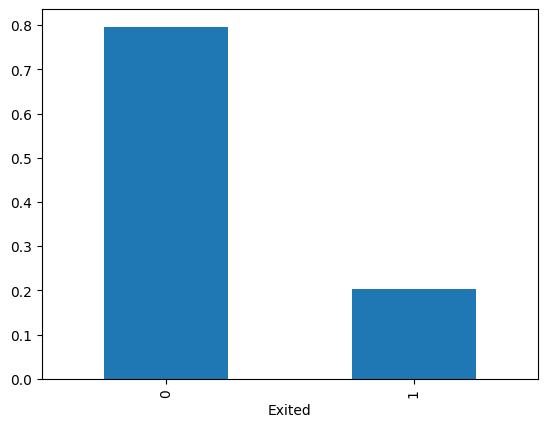

In [153]:
churn_df['Exited'].value_counts(normalize=True).plot.bar()
# Most customer of the banks are sticky

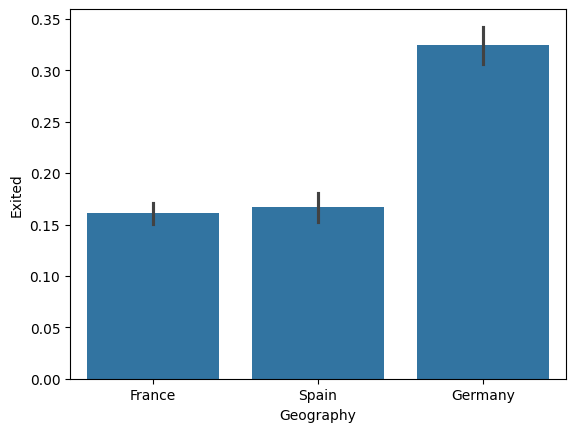

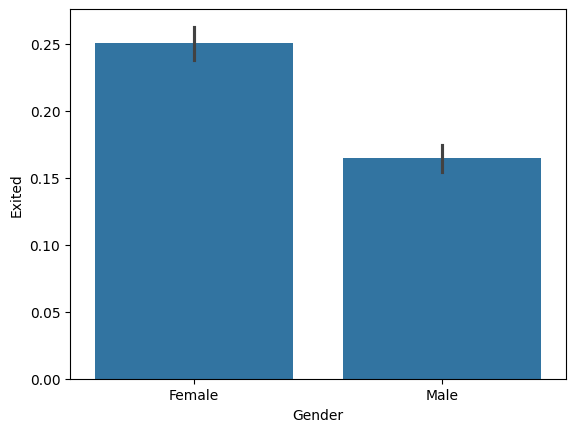

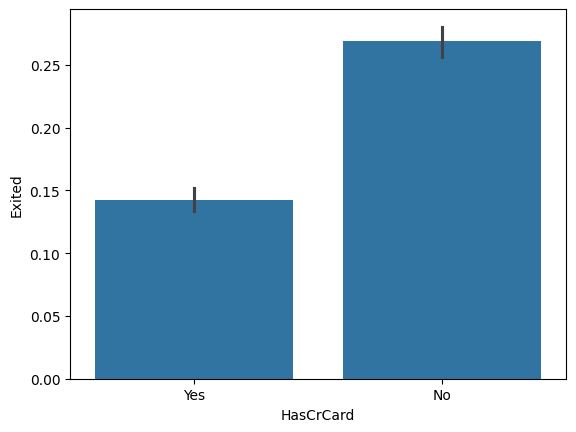

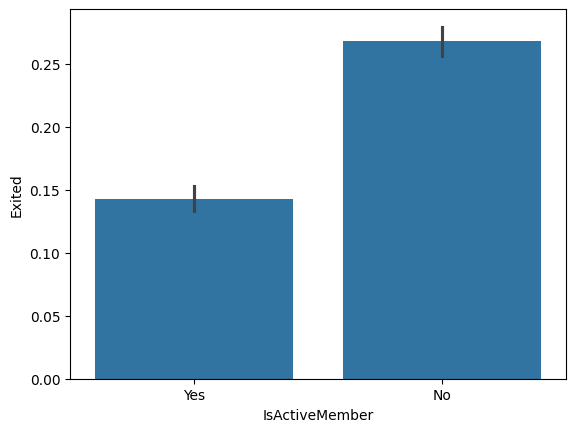

In [158]:

for col in churn_df.drop("Surname", axis=1).select_dtypes(include='object'):
    sns.barplot(x=col, y='Exited', data=churn_df)
    plt.show()

1. German customer have the highest churn.
2. Female have higher churn rate than males.
3. Customer that have no credit car are mostly likely to chrun that do
4. Customer that's not active member have the highest chance of churning.

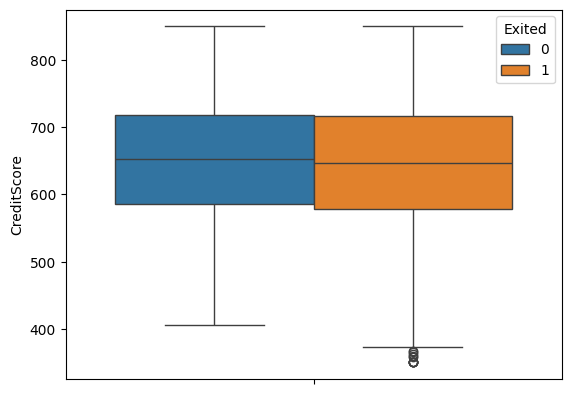

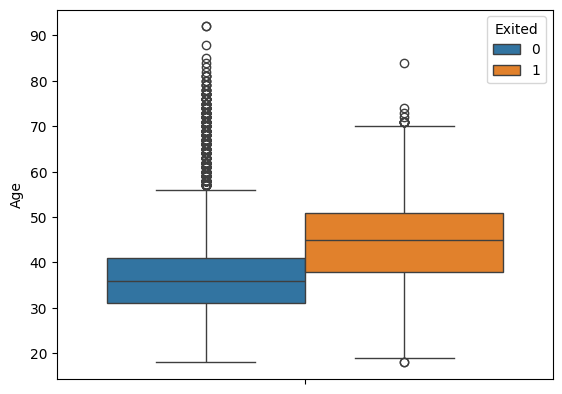

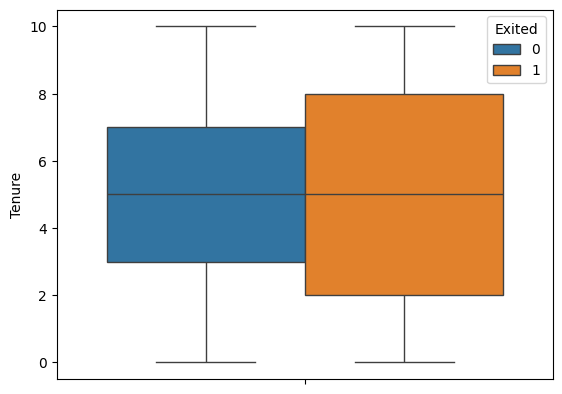

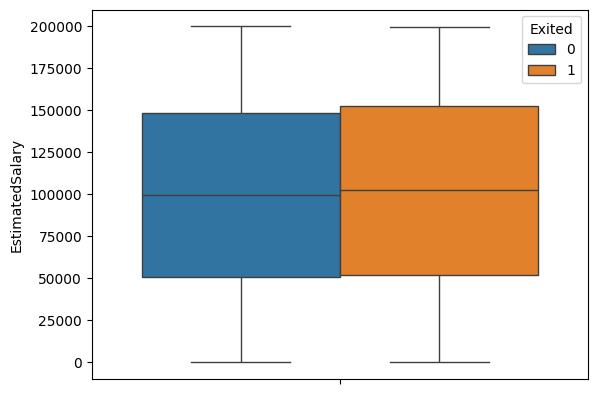

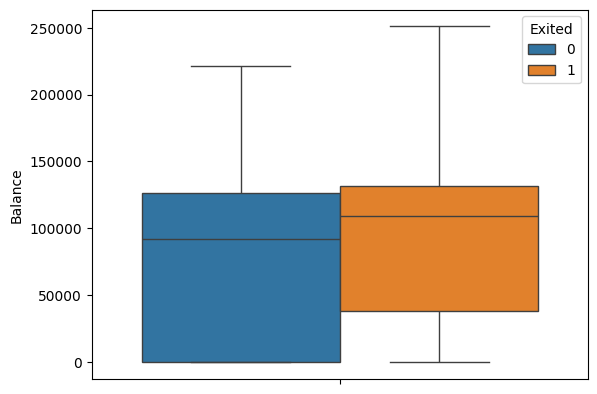

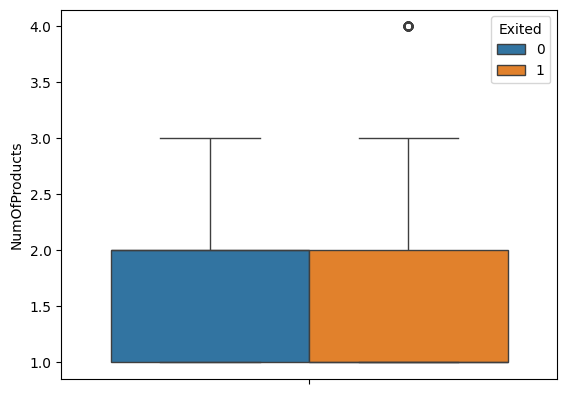

In [164]:
for col in churn_df.drop(["CustomerId", "Exited"], axis=1).select_dtypes(include='number'):
    sns.boxplot(hue='Exited', y=col, data=churn_df)
    plt.show()



1. Older customer seems more likely to churn
2. Tenure's median is the same but the spread of churners is much wider
3. We do see a higher median for churners and lower min  or floor for non-churners


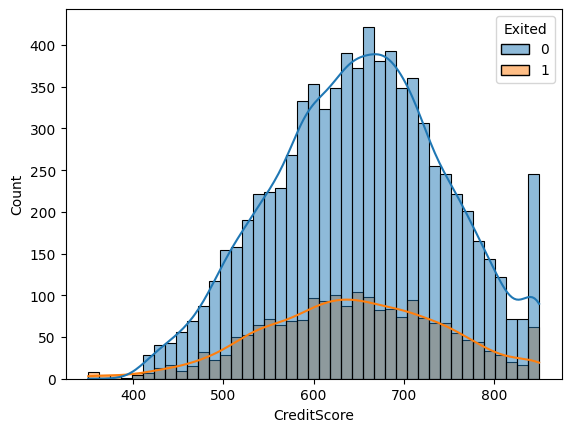

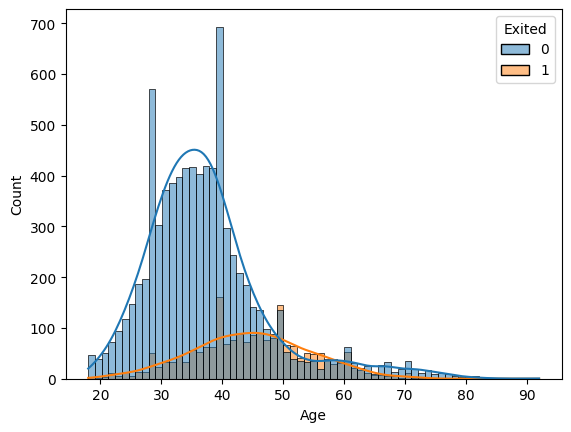

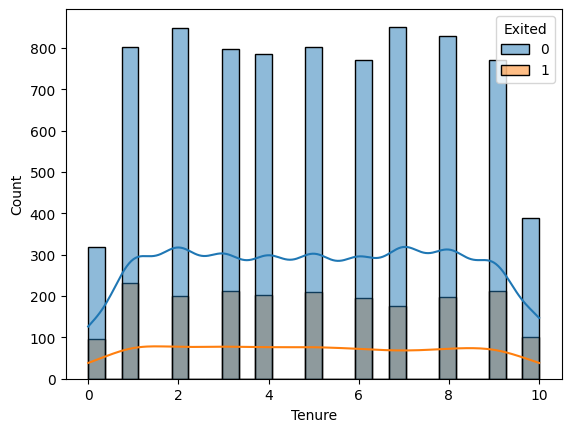

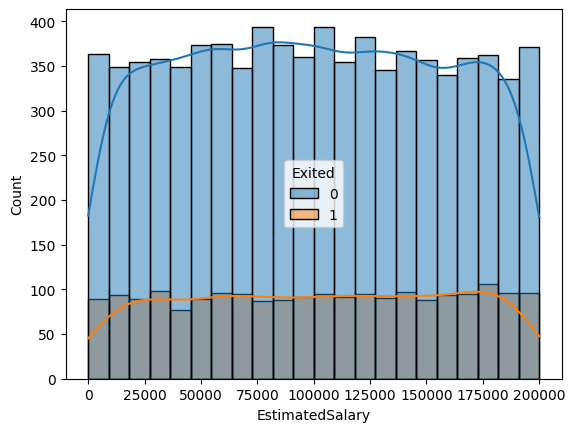

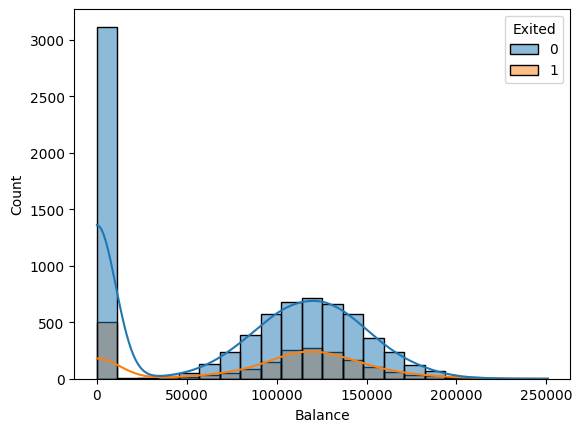

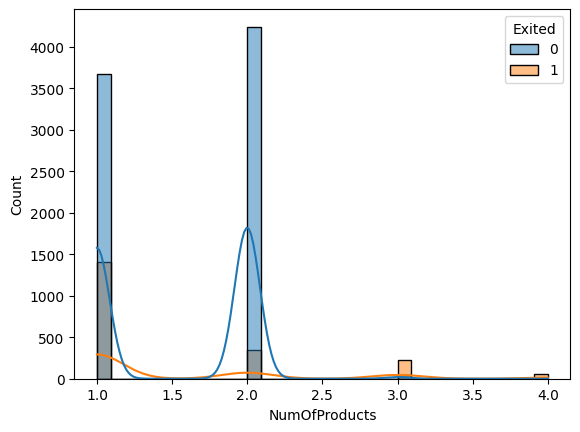

In [166]:
for col in churn_df.drop(["CustomerId", "Exited"], axis=1).select_dtypes(include='number'):
    sns.histplot(hue='Exited', x=col, data=churn_df, kde=True)
    plt.show()

### Prepare the data for Modeling
- create a dataset that exclueds any columns that aren't be suitable for modeling
- create dummy variables for categorical fields
- create a new "balace_v_income" feature, which divides a customer's bank balance by their estimated salary, then visualize that feature vs. churn status

In [167]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [170]:
modelling_df = churn_df.drop(columns = ["CustomerId", "Surname"])

In [175]:
# Create dummy variable
modelling_df = pd.get_dummies(modelling_df, drop_first=True)

In [177]:
modelling_df["Balance_v_Salary"] = modelling_df["Balance"] / modelling_df["EstimatedSalary"]

In [178]:
modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Salary
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


<Axes: ylabel='Balance_v_Salary'>

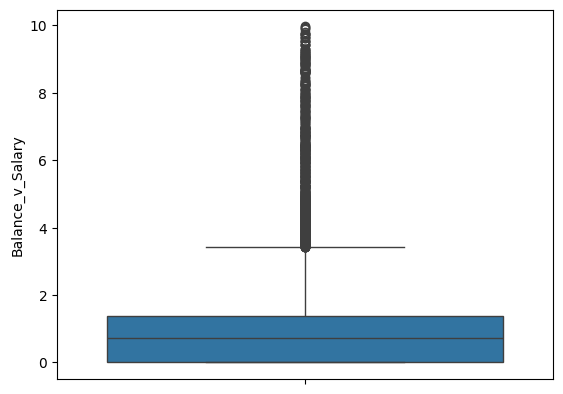

In [183]:
sns.boxplot(data=modelling_df.query("Balance_v_Salary < 10"), y="Balance_v_Salary")

In [181]:
modelling_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000000,718.000000,850.00000
Age,10000.0,38.921500,10.487552,18.00,32.00,37.000000,44.000000,92.00000
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000000,7.000000,10.00000
EstimatedSalary,10000.0,100092.252506,57510.146401,11.58,51002.11,100196.062500,149388.247500,199992.48000
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540000,127644.240000,250898.09000
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000000,2.000000,4.00000
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000000,0.000000,1.00000
Balance_v_Salary,10000.0,3.878703,108.337260,0.00,0.00,0.747002,1.514022,10614.65544


<Axes: ylabel='Balance_v_Salary'>

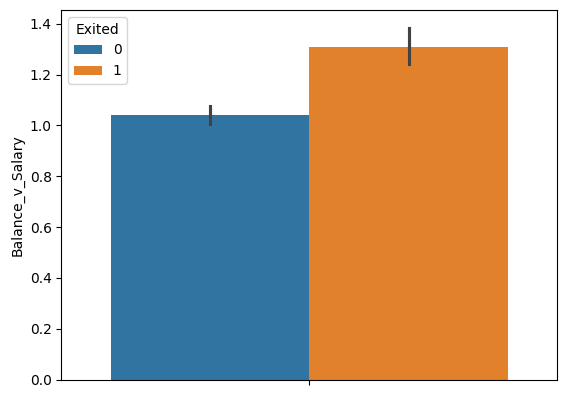

In [185]:
sns.barplot(data=modelling_df.query("Balance_v_Salary < 10"), y="Balance_v_Salary", hue="Exited")

### Balance vs Salary may have an impact on predicting
- Customer that have a higher ration of balance vs salary are most likely to churn